In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

R² score: 0.697
Intercept (b0): 49.09
Volume Weight (b1): 0.0033
Sentiment Weight (b2): 14.7046


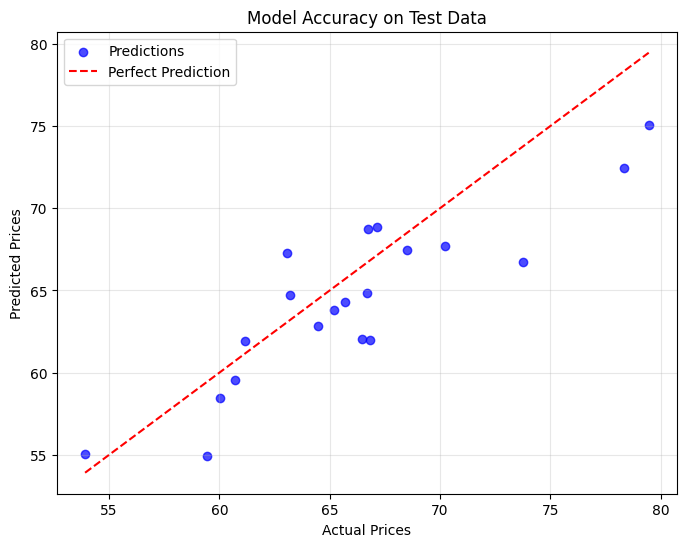

In [3]:

# Simulated data
np.random.seed(42)
volume = np.random.randint(1000, 5000, 100)
sentiment = np.random.uniform(0, 1, 100)
price = 50 + 0.003*volume + 15*sentiment + np.random.normal(0, 3, 100)

X = np.column_stack((volume, sentiment))
y = price

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.3f}")
print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Volume Weight (b1): {model.coef_[0]:.4f}")
print(f"Sentiment Weight (b2): {model.coef_[1]:.4f}")

# Visual check
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Model Accuracy on Test Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Simulate data
np.random.seed(42)
volume = np.random.randint(1000, 5000, 200)
sentiment = np.random.uniform(0, 1, 200)
price_change = 0.002*volume + 10*sentiment + np.random.normal(0, 2, 200)

# Convert price change into UP (1) or DOWN (0)
direction = (price_change > np.median(price_change)).astype(int)

X = np.column_stack((volume, sentiment))
y = direction

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a classifier (not regressor now)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)


Model Accuracy: 0.78
Confusion Matrix:
[[20  6]
 [ 5 19]]


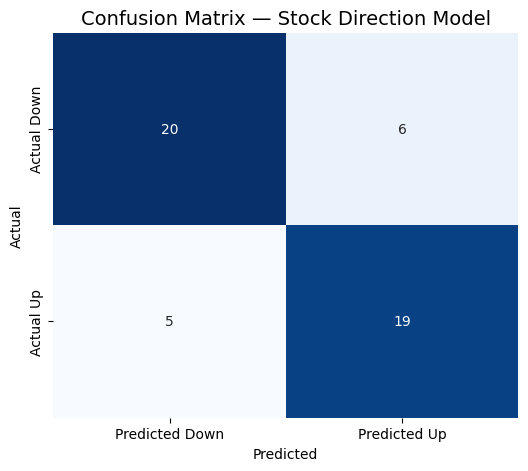

In [5]:
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Down", "Predicted Up"],
            yticklabels=["Actual Down", "Actual Up"])

plt.title("Confusion Matrix — Stock Direction Model", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

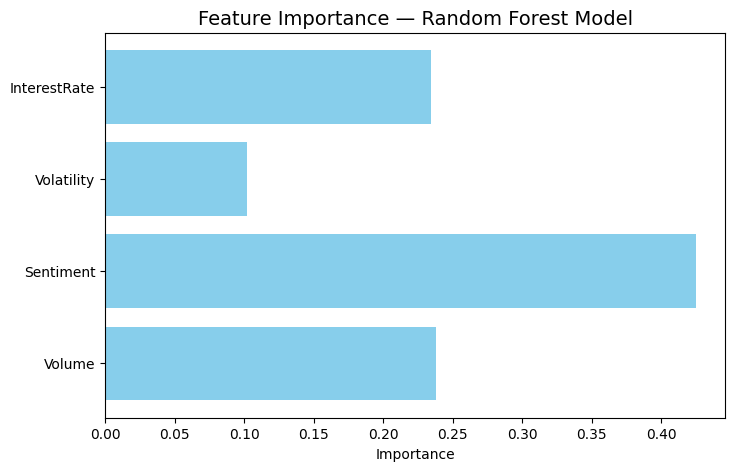

In [6]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Simulate a richer dataset
np.random.seed(42)
data = pd.DataFrame({
    "Volume": np.random.randint(1000, 5000, 100),
    "Sentiment": np.random.uniform(-1, 1, 100),
    "Volatility": np.random.uniform(0.1, 0.5, 100),
    "InterestRate": np.random.uniform(0.01, 0.05, 100)
})
# True pattern (hidden)
data["Up"] = (
    (0.002 * data["Volume"]) +
    (5 * data["Sentiment"]) -
    (8 * data["Volatility"]) -
    (200 * data["InterestRate"]) +
    np.random.normal(0, 0.5, 100)
) > 0  # boolean (up or down)

# Split features and target
X = data.drop("Up", axis=1)
y = data["Up"]

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Plot them
plt.figure(figsize=(8,5))
plt.barh(X.columns, importances, color="skyblue")
plt.title("Feature Importance — Random Forest Model", fontsize=14)
plt.xlabel("Importance")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# --- Simulated dataset ---
np.random.seed(42)
X = np.random.rand(200, 2) * 10
y = 3*X[:,0] + 2*X[:,1] + np.random.normal(0, 2, 200)  # some noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Single Decision Tree ---
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

# --- Random Forest (Ensemble of Trees) ---
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

# --- Compare R² scores ---
print("Decision Tree R²:", r2_score(y_test, tree_pred))
print("Random Forest R²:", r2_score(y_test, forest_pred))


Decision Tree R²: 0.7963257034739606
Random Forest R²: 0.9355254374419901


In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np

# Simulated data
np.random.seed(42)
volume = np.random.randint(1000, 5000, 100)
sentiment = np.random.uniform(0, 1, 100)
price = 50 + 0.004*volume + 18*sentiment + np.random.normal(0, 2, 100)

X = np.column_stack((volume, sentiment))
y = price

# Models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

rf.fit(X, y)
gb.fit(X, y)

# Predictions
rf_pred = rf.predict(X)
gb_pred = gb.predict(X)

# Compare performance
rf_r2 = r2_score(y, rf_pred)
gb_r2 = r2_score(y, gb_pred)

print(f"Random Forest R²: {rf_r2:.3f}")
print(f"Gradient Boosting R²: {gb_r2:.3f}")


Random Forest R²: 0.976
Gradient Boosting R²: 1.000


In [19]:
from sklearn.metrics import r2_score

# Predictions on test data
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# R² on test data
print("Random Forest (test):", r2_score(y_test, rf_pred))
print("Gradient Boosting (test):", r2_score(y_test, gb_pred))

Random Forest (test): -19.721282707004217
Gradient Boosting (test): -17.873857817548867
